# Libaries

In [ ]:
import numpy as np
from skimage import io as io
import matplotlib.pyplot as plt
from scipy import signal
import torch.nn.functional as F
from torch.nn.functional import *
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

# Helper functions

In [ ]:
def make_ani(A, colormap='gray'):

    fig, ax = plt.subplots()
    im = ax.imshow(A[0,:,:], cmap = colormap);
    ax.axis('off')
    fig.set_size_inches(12, 12)

    def animate(data, im):
        im.set_data(data)

    def step():
        for i in range(A.shape[0]):
            data = A[i,:,:]
            yield data

    return animation.FuncAnimation(fig, animate, step, interval=100, repeat=True, fargs=(im,))

In [ ]:
def conv2(w,f): #GPU conv with padding

    n = conv2d(w.type(torch.int),f.type(torch.int))
    n = pad(n, (1, 1, 1, 1)) #add ones to the sides of the matrix

    return n

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(8, 8)
    plt.show()

# Objective 1: Plot random binary image 10 x 10

In [ ]:
random_black_and_white = np.random.random((10, 10))

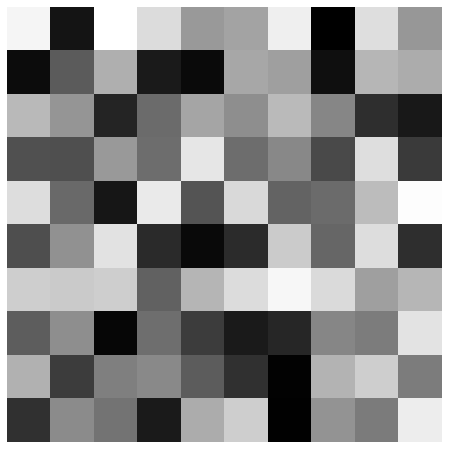

In [ ]:
plot(random_black_and_white)

In [ ]:
random_black_and_white

array([[0.9577276 , 0.11580688, 0.9983171 , 0.86643754, 0.61475677,
        0.65149362, 0.93758411, 0.03734549, 0.87306555, 0.60589685],
       [0.08403631, 0.37897328, 0.69648592, 0.13771474, 0.07734968,
        0.66642227, 0.63675943, 0.09633088, 0.72211712, 0.68306335],
       [0.73290557, 0.59702784, 0.17912998, 0.44220639, 0.65789004,
        0.57372007, 0.73659881, 0.54254985, 0.21035903, 0.12763345],
       [0.33881985, 0.33662936, 0.61399045, 0.44984089, 0.9015725 ,
        0.45011395, 0.54799932, 0.31331666, 0.87440943, 0.25750631],
       [0.86719223, 0.43500355, 0.12025707, 0.91775621, 0.35312837,
        0.85413008, 0.41136074, 0.44138758, 0.74451167, 0.98857187],
       [0.33022282, 0.58475443, 0.88816458, 0.1958196 , 0.07380096,
        0.20155463, 0.80261474, 0.42244332, 0.8686973 , 0.21227061],
       [0.81151585, 0.79643641, 0.81254738, 0.4028034 , 0.71984633,
        0.8664412 , 0.96506122, 0.85689191, 0.63537634, 0.72285433],
       [0.38883418, 0.57231873, 0.0634188

In [ ]:
random_black_and_white.shape

(10, 10)

Comments: 

* What is an image? *It seems images are composed of pixels*
* What is a binary image? *It seems are those whose pixels have two-color capabilities. *
* *Usually, the two only possible colors are black and white *
* How does randomness work? *It seems randoness refers to unexpected order or entropy.*
* How can we add randomness in Python? *It seems that the numpy library and the 'random' package randomize numbers assigned by the attributes, which add randomness to the system.*
* Why do we add 10,10 to the argument of the np.random.random() function? *it seems we add 10,10 to the argument of the np.random.random() function to indicate and generate a 10x10 binary image *
* Why do we call the object 'random_black_and_white' after created? *it seems this helps to confirm that the image is an array of numbers, either 2D or 3D*
* How do we know it is a 2D image? *it seems by calling and/or using the 'shape' library, we can see the dimensions, and therefore notice we have only 2 dimensions, meaning it is a 2D image*
* From my understanding, it seems this is the purpose of 'random_black_and_white.shape' in this context

# Objective 2: Plot random rgb image 10 x 10

In [ ]:
color_random_img = np.random.random((10,10,3))   # Here we add the third dimension of size three for three input channels: red, blue, and green

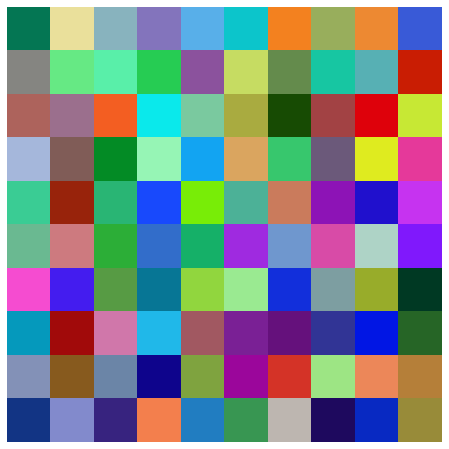

In [ ]:
plot(color_random_img)

In [ ]:
color_random_img

array([[[1.93832715e-02, 4.65915637e-01, 3.29049367e-01],
        [9.18884580e-01, 8.79229183e-01, 6.11117617e-01],
        [5.34068226e-01, 7.05844079e-01, 7.45420303e-01],
        [5.14889799e-01, 4.56927775e-01, 7.38361384e-01],
        [3.48648955e-01, 6.88547452e-01, 9.14831266e-01],
        [4.84808675e-02, 7.76009041e-01, 7.98396542e-01],
        [9.54328394e-01, 5.06234244e-01, 1.22619097e-01],
        [5.99095564e-01, 6.84023047e-01, 3.64081932e-01],
        [9.30734263e-01, 5.38250811e-01, 1.97965245e-01],
        [2.27445649e-01, 3.52996682e-01, 8.44282928e-01]],

       [[5.25113180e-01, 5.25231136e-01, 5.08964171e-01],
        [4.02606639e-01, 9.14045992e-01, 5.20465083e-01],
        [3.51025865e-01, 9.39859853e-01, 6.66001455e-01],
        [1.50534029e-01, 8.03919988e-01, 3.25954775e-01],
        [5.47145042e-01, 3.22067297e-01, 6.17745180e-01],
        [7.76939134e-01, 8.63351296e-01, 3.84985470e-01],
        [3.93924206e-01, 5.48404789e-01, 3.00170020e-01],
        [9.2

In [ ]:
color_random_img.shape

(10, 10, 3)

Comments: 
* How does 10x10 random binary image differs from a 10x10 random RGB image? *It seems that the 10x10 random RGB image has an additional dimension of size three that relates to color whereas in the 10x10 random binary image this additional dimension is unavailable*  
* Is the RGB related to the third dimension? *it seems the third dimension represents three inputs for three possible image color: red, green, and blue*
* How does the numerical value of each color make an impact? *it seems a numerical representation of each channel provides the final color based on combination (please correct me if I am wrong).*
* It seems the comments from objective 1 may also apply to objective 2 in this context if possible.

# Objective 3: Load image from url and plot it

In [ ]:
internet_rgb_logo = plt.imread("http://matplotlib.sourceforge.net/_static/logo2.png")

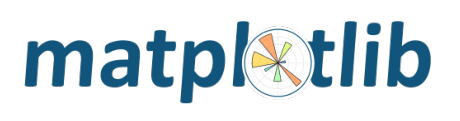

In [ ]:
plot(internet_rgb_logo)

In [ ]:
internet_rgb_logo

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [ ]:
internet_rgb_logo.shape

(130, 542, 4)

In [ ]:
internet_binary_logo = np.mean(internet_rgb_logo, axis=2)

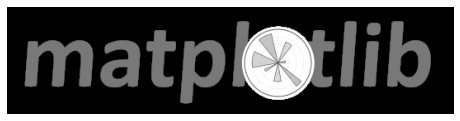

In [ ]:
plot(internet_binary_logo)

In [ ]:
internet_binary_logo.shape

(130, 542)

Comments: 
* How can we import an png image from the internet? *It seems by using plt.read() function from the matplotlib library* 
* How can we plot the image? *it seems we used the previously defined function under the 'Helper functions' section called plot()*
* How can we convert the image to a binary image? *it seems the np.mean() function avergaed the pixels across the second axis*
* What is the second axis? *it seems to be the columns*
* Why do we convert the RGB url imported image into a binary image? *it seems that objective 5, convolution using the random filter from objective 4, may require both the filter and the image to be two dimensional to be able to proceed with the convolution*
* Why did we plot the 'internet_logo' object after converting it into a two-dimensional array from a tri-dimensional *array? it seems that plotting support to observe the occurrence of the intended change*
* Why did we call the 'internet_logo.shape' created object? it seems to confirm that the image is represented as a two-dimensional array


## Supplemental materials

In [ ]:
rgb_quantitative_array_sum = np.sum(internet_rgb_logo)
print(quantitative_array_sum)

12694.382


In [ ]:
rgb_max_num_of_quantitative_array_sum = np.amax(internet_rgb_logo)
print(max_num_of_quantitative_array_sum)

1.0


Comments: 
* How can we review the image is taken as an array of numbers between 0 and 1? *it seems the np.amax() function select the maximum numerical value present on the array*
* Why do we print it? *it seems to be able to observe and confirm that the maximum numerical value is actually 1*
* How can we use the np.sum() function in this context? *it seems the np.sum() function helps to determine the sum of values between 0 and 1 to know there are decimal numbers* *(please correct me if I am wrong).*



# Objective 4: Create random 3x3 filter and plot it 

In [ ]:
random_binary_filter = np.random.random((3,3))

In [ ]:
random_binary_filter

array([[0.90211468, 0.80606596, 0.88066055],
       [0.77192273, 0.81024161, 0.27572712],
       [0.97686121, 0.22413096, 0.44807047]])

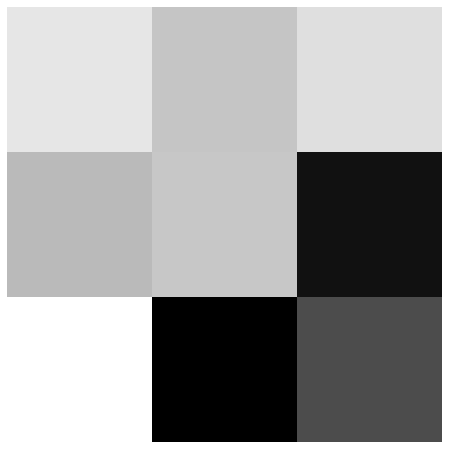

In [ ]:
plot(random_binary_filter)

Comments: 
* How creating a random 3x3 filter differs from the random 10x10 binary image from objective 1? *It seems the main difference is that the random filter has 3x3 size or dimensions whereas the random binary image has 10x10 size or dimension*
* Can we create a filter and a binary image using the np.random.random() function? *it seems they both use the same np.random.random() function, which may indicate that a random filter is a binary image in this case*
* How does the random 3x3 filter differs from the 10x10 random RGB image? *it seems that we may need to add a third dimension of numerical value 3 to include the three color input that make a color image, which are red, green, and blue*
* How can we use the binary random filter and the rgb random filter in objective 5, convolution? *it seems the dimensions of the image should be equivalent to the dimensions of the filter* 
* *Then, if we use the rgb version of the url imported image, we may need to use the rgb random filter*
* *But, if we use the binary version of the url imported image, we may need to use the binary random filter*
* How does ploting work in this case? *it seems we, humans, are visual, so this helps to identify differences.*


## Supplemental materials 

In [ ]:
random_rgb_filter = np.random.random((3,3,3))

In [ ]:
random_rgb_filter

array([[[0.06801617, 0.46722836, 0.02409367],
        [0.62912102, 0.9112853 , 0.35321657],
        [0.37576395, 0.8960858 , 0.9131489 ]],

       [[0.40241356, 0.40219845, 0.31744821],
        [0.95363917, 0.0896618 , 0.00957357],
        [0.55967301, 0.3211381 , 0.43628266]],

       [[0.0328609 , 0.66164785, 0.42606025],
        [0.28061621, 0.00435426, 0.62018447],
        [0.32753433, 0.90405018, 0.59124338]]])

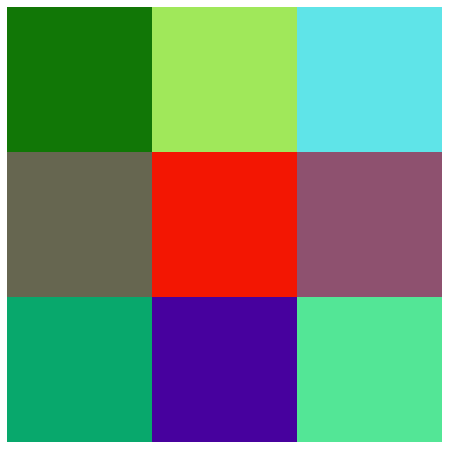

In [ ]:
plot(random_rgb_filter)

# Objective 5: Convolve your random filter with the image you loaded and plot the feature map

In [ ]:
binary_basic_version_convolution = signal.convolve2d(internet_binary_logo, random_binary_filter, mode='same')

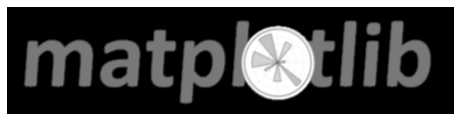

In [ ]:
plot(binary_basic_version_convolution)

Comments: 

* What convolution method did we choose? *it seems we chose to call the signal.convolve2d() function from SciPy python library*
* Why this type specifically? *from my understanding, it seems to be the most simple yet effective approach that uses the binary filter as designed on objective 4 (please correct me if I am wrong)*

## Supplemental materials

[[0.00918418 0.77822713 0.02842038]
 [0.29807047 0.18906756 0.90395095]
 [0.66607501 0.4771247  0.41608453]]


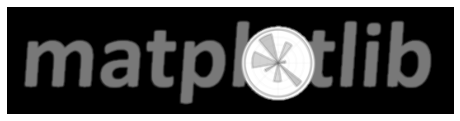

[[0.00918418 0.77822713 0.02842038]
 [0.29807047 0.18906756 0.90395095]
 [0.66607501 0.4771247  0.41608453]]


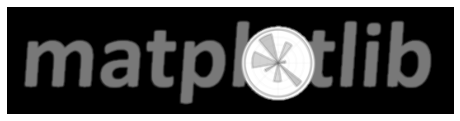

[[0.00918418 0.77822713 0.02842038]
 [0.29807047 0.18906756 0.90395095]
 [0.66607501 0.4771247  0.41608453]]


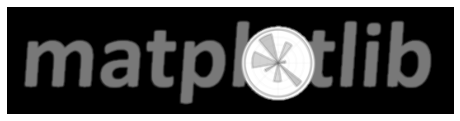

In [ ]:
#Additional exploration
for i in range(3):
    a = 2*np.random.random((3,3))-1
    print(random_filter)
    z=binary_basic_version_convolution
    plot(z)

Comments: 

* How could this convolution approach be useful in this case (if possible)? *From my understanding and in my opinion, it seems it may be unavailable in this case because it seems there is no selective distinction.* 
* Maybe selective distinction is unavailable because the filters are random (I am unsure; please correct me if I am wrong)

# Objective 6: Run game of life in pytorch starting from random 20x20 grid plot initial and final conditions

In [ ]:
w = (np.random.random((100,100)) > 0.5) #game of life world grid w
f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

In [ ]:
w 

array([[ True,  True,  True, ..., False,  True,  True],
       [False, False,  True, ..., False,  True,  True],
       [False, False,  True, ..., False,  True,  True],
       ...,
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True,  True,  True]])

In [ ]:
f

matrix([[1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]])

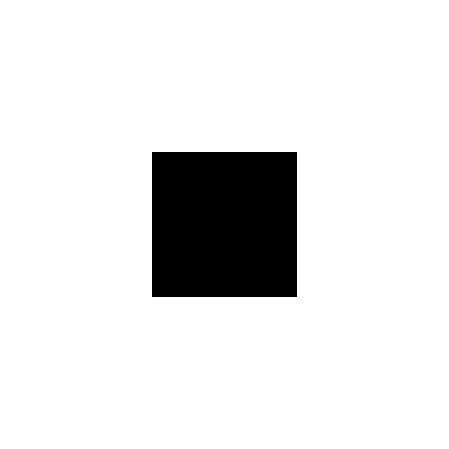

In [ ]:
plot(f)

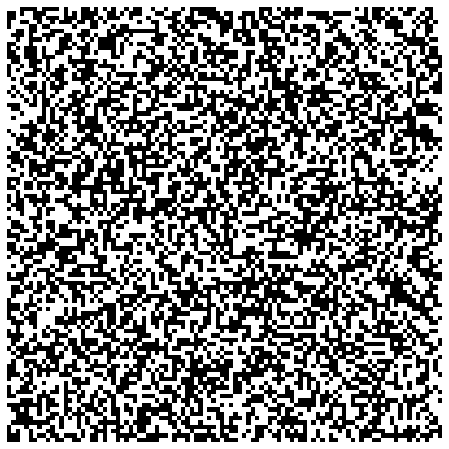

In [ ]:
plot(w)

In [ ]:
steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.tensor(w.astype(int))[None,None,:,:]
f = torch.tensor(f.astype(int))[None,None,:,:]

In [ ]:
for i in range(steps):

    n = conv2(w,f)
    
    w = (w * (n==2)) + (n==3)
    
    A[i] = w

In [ ]:
w

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 1,  ..., 0, 0, 0],
          [0, 1, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]])

In [ ]:
f

tensor([[[[1, 1, 1],
          [1, 0, 1],
          [1, 1, 1]]]])

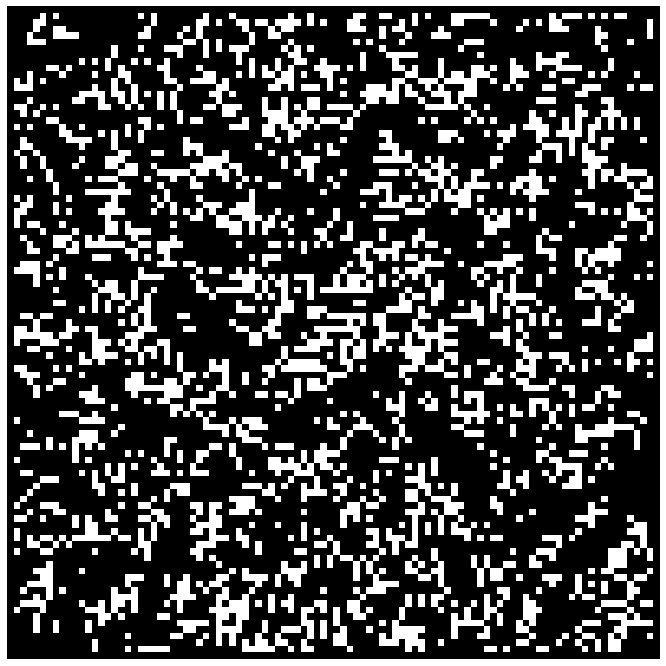

In [ ]:
make_ani(A)

Comments: 
* What does the w letter mean in this context? *from my understanding, it seems the w is the object name that stores the grid or matrix arena of the game of life* 
* How does the w arena support the game of life? *it seems the grid w may be a bunch of cells or pixels that will be 0 (black) or 1 (white)*
* What does it mean 0 (black) and 1(white) in terms of presence and/or survival of cells? *it seems the 0 (black) indicates 'off' or 'terminated'  whereas the 1 (white) indicates 'on' or 'survived'.* 
* What are the rules of the game of life? it seems the rules are: *(1) Any live cell with two or three live neighbours survives, (2) Any dead cell with three live neighbours becomes a live cell, and (3) All other live cells die in the next generation. Similarly, all other dead cells stay dead.*
* What is in common among the rules? *it seems to be the neighbors* 
* *It seems the survival state of the reference cell, in this case depends on the neighbors* 
* What does the f mean? *it seems the f is the object storing the details of the filter for the game of life arena that will look at the neighbors and determine if the rules are being met*
* Why f is helpful? *it seems it helps to follow the rules of the game of life in regards to the neighbors* 
* How can we look at the neighbors to determine 'survival' or turning 'on' of the cell? *it seems 'f' is looking at the neighbors based on the rules of the game of life* 
* What happens if the rules are met? *it seems the cell turns 'on' indicating it survived* 
* How can we see the initial state of the filter matrix? *it seems by ploting f while it is a matrix and before we convert it into a tensor* 
* How does the matrix of f and the plot of the f correlate and/or communicate? *it seems the interpretation of the plot may be that the black square on the center may represent the cell in 'off' state or '0' whereas the white surrounding may represent the search for neighbors in 'on' state or '1'*
* Why do we represent the search of the neighbors as 1 and not zero? *it seems it may be related to capturing, maintaining, and reporting capabilities of the numerical state value of the neighbors is allowed when we multiply by 1, but it would be missed and/or altered if we multiply by '0' or any other number.* 
* *It seems this is because we are multiplying by 1, because everything by 1 equals the number it is being multiplied to.
* What does 'A' mean? it seems A stores the 1000 feature maps, each frame, 'w' into 'A', the container, to do the animation.* 
* How can we further understand the function of A in this context? *it seems it helps to think about it as a movie*
* Why? *well, it seems movies are made of a sequence of frames put together, then A seems to be the computational representation of a container puts the frames in a specific order to make sense when they are run, like in a movie* 
* What does steps mean? *it seems the steps is similar to iterations*

# References


* Image as ***internet*** object retrieved from:
https://stackoverflow.com/questions/12116050/how-to-plot-remote-image-from-http-url
* General fundamentals for objective 1 retrieved from:
https://github.com/williamedwardhahn/ComplexSystems/blob/main/Complex_Systems_Lab_RandomWalk.ipynb
* General fundamentals for objectives 1-6 retrieved from:
https://github.com/williamedwardhahn/ComplexSystems/blob/main/Complex_Systems_Lab_Convolution_and_PDE.ipynb
* Game of life rules retrieved from: 
https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life


*Consulted and received assistance from: <br>

* Rachel St Clair, Graduate Student Researcher, Machine Perception and Cognitive Robotics Laboratory, FAU

